<a href="https://colab.research.google.com/github/nidhiparker333/Data-Analytics-Projects/blob/main/A_B_testing_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import statsmodels.api as sm

In [72]:
# Load the dataset from the Google Drive link
file_url = "https://drive.google.com/uc?id=1eGkk-neMUNGasDWWbnyQrNLM0cd3uOwm"
output_path = "updated_marketing_AB.csv"
!gdown {file_url} -O {output_path}

Downloading...
From: https://drive.google.com/uc?id=1eGkk-neMUNGasDWWbnyQrNLM0cd3uOwm
To: /content/updated_marketing_AB.csv
100% 22.6M/22.6M [00:00<00:00, 59.7MB/s]


In [73]:
# Read the CSV file into a DataFrame
data = pd.read_csv(output_path)

In [74]:
# Inspect the first few rows of the dataset
print(data.head())

   Index  Customer ID Experiment Group  Is Converted  Total Ads Shown  \
0      0      1069124               ad         False              130   
1      1      1119715               ad         False               93   
2      2      1144181               ad         False               21   
3      3      1435133               ad         False              355   
4      4      1015700               ad         False              276   

  Peak Ads Day  Peak Ads Hour  
0       Monday             20  
1      Tuesday             22  
2      Tuesday             18  
3      Tuesday             10  
4       Friday             14  


In [75]:
# Check for missing values
print(data.isnull().sum())


Index               0
Customer ID         0
Experiment Group    0
Is Converted        0
Total Ads Shown     0
Peak Ads Day        0
Peak Ads Hour       0
dtype: int64


In [79]:
# Check for duplicate values with respect to 'Customer ID'
if 'Customer ID' in data.columns:
    duplicates = data.duplicated(subset=['Customer ID'], keep=False)
    if duplicates.any():
        print("Duplicate Customer IDs found:")
        print(data[duplicates])
    else:
        print("No duplicate Customer IDs found.")


No duplicate Customer IDs found.


In [76]:
# Ensure 'Peak Ads Hour' values are between 1 and 24 and fix negative values
numeric_columns = data.select_dtypes(include=['number']).columns

In [78]:
# Fill any missing 'Peak Ads Hour' values with the median
if 'Peak Ads Hour' in data.columns:
    data['Peak Ads Hour'] = data['Peak Ads Hour'].apply(lambda x: x if 1 <= x <= 24 else np.nan)
    data['Peak Ads Hour'] = data['Peak Ads Hour'].fillna(data['Peak Ads Hour'].median())

# Check if the categorical variables have appropriate number of levels
df_cat = data[['Experiment Group', 'Is Converted', 'Peak Ads Day', 'Peak Ads Hour']]
print("Number of unique values per categorical column:")
print(df_cat.nunique())

# Display unique levels for each categorical variable
print("\nUnique levels for each categorical variable:")
for col in df_cat.columns:
    print(f"{col.upper()}: {df_cat[col].unique()}")


Number of unique values per categorical column:
Experiment Group     2
Is Converted         2
Peak Ads Day         7
Peak Ads Hour       23
dtype: int64

Unique levels for each categorical variable:
EXPERIMENT GROUP: ['ad' 'psa']
IS CONVERTED: [False  True]
PEAK ADS DAY: ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
PEAK ADS HOUR: [20. 22. 18. 10. 14. 13. 19. 11. 12. 16. 21.  3. 23.  4.  8.  2. 15.  1.
  6. 17.  7.  9.  5.]


In [81]:
data.drop(columns=['Customer ID', 'Index'], errors='ignore', inplace=True)
print(data.head())


  Experiment Group  Is Converted  Total Ads Shown Peak Ads Day  Peak Ads Hour
0               ad         False              130       Monday           20.0
1               ad         False               93      Tuesday           22.0
2               ad         False               21      Tuesday           18.0
3               ad         False              355      Tuesday           10.0
4               ad         False              276       Friday           14.0


In [82]:
# Check if the categorical variables have appropriate number of levels
df_cat = data[['Experiment Group', 'Is Converted', 'Peak Ads Day', 'Peak Ads Hour']]
print("Number of unique values per categorical column:")
print(df_cat.nunique())

Number of unique values per categorical column:
Experiment Group     2
Is Converted         2
Peak Ads Day         7
Peak Ads Hour       23
dtype: int64


In [83]:
# Display unique levels for each categorical variable
print("\nUnique levels for each categorical variable:")
for col in df_cat.columns:
    print(f"{col.upper()}: {df_cat[col].unique()}")



Unique levels for each categorical variable:
EXPERIMENT GROUP: ['ad' 'psa']
IS CONVERTED: [False  True]
PEAK ADS DAY: ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
PEAK ADS HOUR: [20. 22. 18. 10. 14. 13. 19. 11. 12. 16. 21.  3. 23.  4.  8.  2. 15.  1.
  6. 17.  7.  9.  5.]


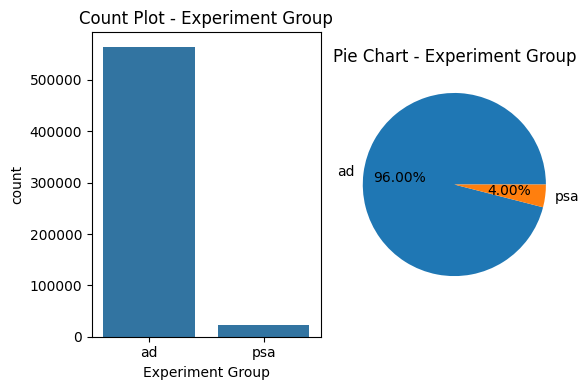

In [84]:
# Perform univariate analysis with count plot and pie chart
variable = 'Experiment Group'
plt.figure(figsize=(6, 4))

# Count plot
plt.subplot(1, 2, 1)
sns.countplot(x=variable, data=df_cat)
plt.title(f"Count Plot - {variable}")

# Pie chart
plt.subplot(1, 2, 2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct="%0.2f%%")
plt.title(f"Pie Chart - {variable}")

# Adjust layout and show plots
plt.tight_layout()
plt.show()


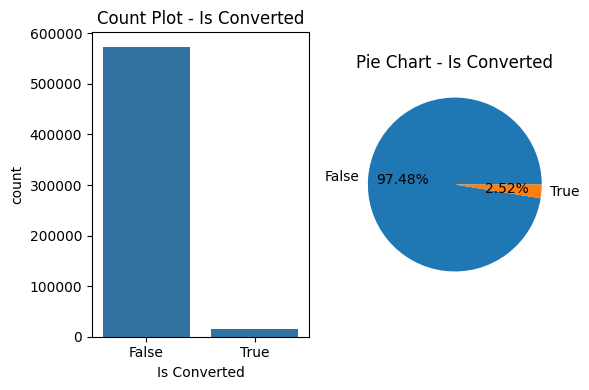

In [85]:
# Perform univariate analysis for 'Is Converted' variable
variable = 'Is Converted'
plt.figure(figsize=(6, 4))

# Count plot
plt.subplot(1, 2, 1)
sns.countplot(x=variable, data=df_cat)
plt.title(f"Count Plot - {variable}")

# Pie chart
plt.subplot(1, 2, 2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct="%0.2f%%")
plt.title(f"Pie Chart - {variable}")

# Adjust layout and show plots
plt.tight_layout()
plt.show()


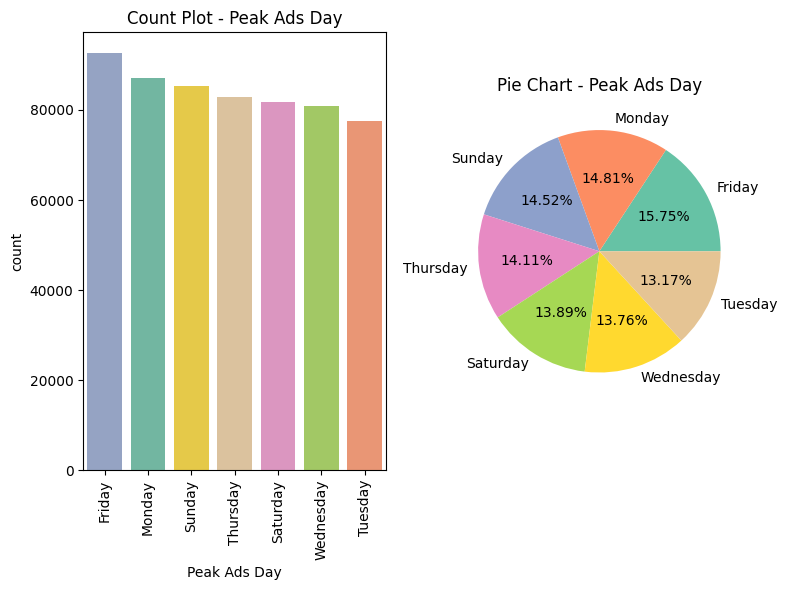

In [94]:
# Perform univariate analysis with count plot and pie chart
variable = 'Peak Ads Day'
plt.figure(figsize=(8, 6))

# Count plot
plt.subplot(1, 2, 1)
sns.countplot(x=variable, data=df_cat, order=df_cat['Peak Ads Day'].value_counts().index, hue=variable, dodge=False, palette='Set2')
plt.title(f"Count Plot - {variable}")
plt.xticks(rotation=90)

# Pie chart
plt.subplot(1, 2, 2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct="%0.2f%%", colors=sns.color_palette('Set2'))
plt.title(f"Pie Chart - {variable}")

# Adjust layout and show plots
plt.tight_layout()
plt.show()

<ipython-input-97-22c6178d352e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=variable, data=df_cat, order=df_cat['Peak Ads Hour'].value_counts().index, palette='Set2')


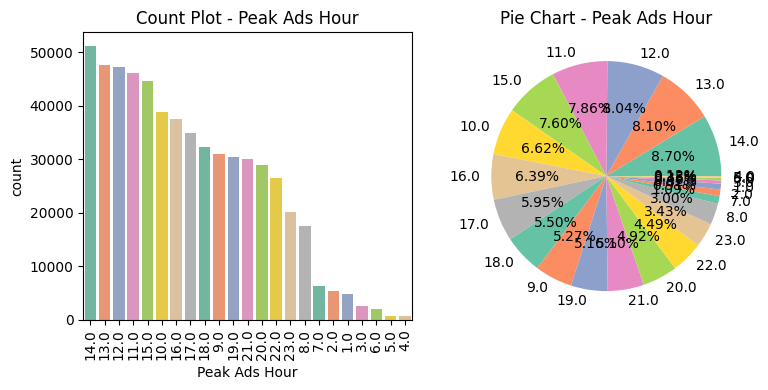

In [97]:
# Perform univariate analysis with count plot and pie chart
variable = 'Peak Ads Hour'
plt.figure(figsize=(8, 4))

# Count plot
plt.subplot(1, 2, 1)
sns.countplot(x=variable, data=df_cat, order=df_cat['Peak Ads Hour'].value_counts().index, palette='Set2')
plt.title(f"Count Plot - {variable}")
plt.xticks(rotation=90)

# Pie chart
plt.subplot(1, 2, 2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct="%0.2f%%", colors=sns.color_palette('Set2'))
plt.title(f"Pie Chart - {variable}")

# Adjust layout and show plots
plt.tight_layout()
plt.show()

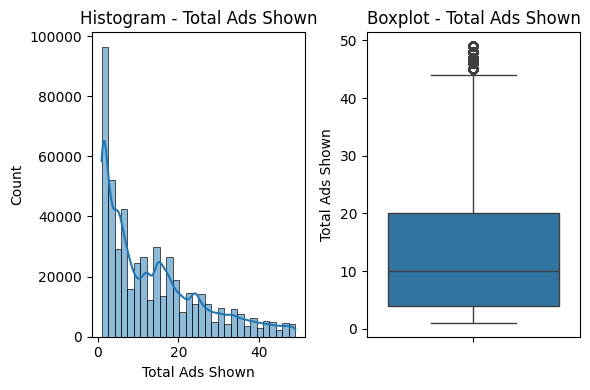

In [100]:
# Perform univariate analysis with histogram and boxplot
variable = 'Total Ads Shown'
plt.figure(figsize=(6, 4))

# Histogram
plt.subplot(1, 2, 1)
# Filtering the data for a value close to the 75th percentile for better visualization
sns.histplot(x=variable, data=data[data[variable] < 50], bins=30, kde=True)
plt.title(f"Histogram - {variable}")

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=variable, data=data[data[variable] < 50])
plt.title(f"Boxplot - {variable}")

# Adjust layout and show plots
plt.tight_layout()
plt.show()

Is Converted         False     True 
Experiment Group                    
ad                0.974453  0.025547
psa               0.982146  0.017854


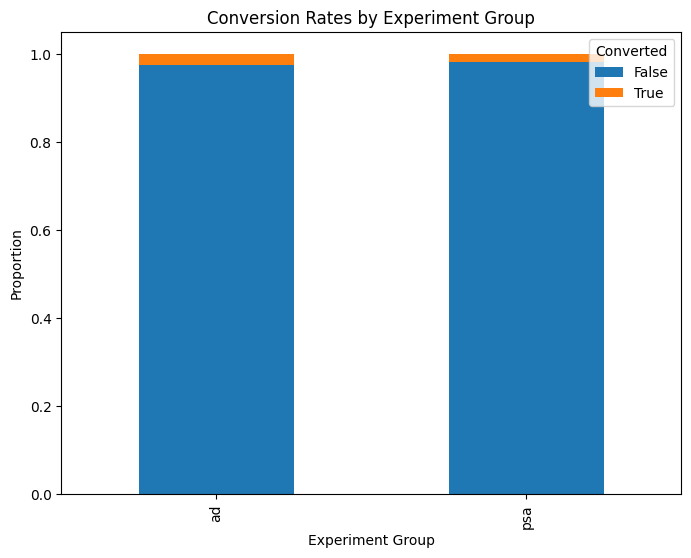

Is Converted     False     True 
Peak Ads Day                    
Monday        0.967188  0.032812
Tuesday       0.970160  0.029840
Wednesday     0.975058  0.024942
Sunday        0.975524  0.024476
Friday        0.977788  0.022212
Thursday      0.978429  0.021571
Saturday      0.978949  0.021051


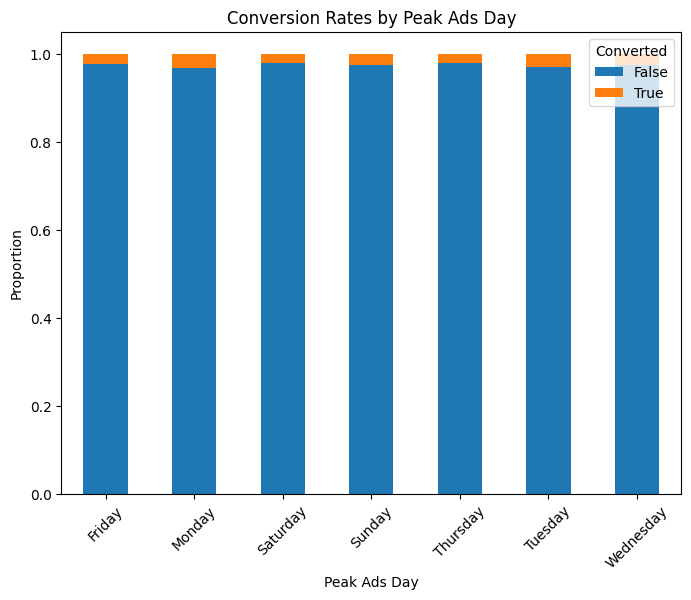

Is Converted      False     True 
Peak Ads Hour                    
16.0           0.969228  0.030772
20.0           0.970197  0.029803
15.0           0.970347  0.029653
21.0           0.971077  0.028923
17.0           0.971790  0.028210
18.0           0.972620  0.027380
14.0           0.972980  0.027020
19.0           0.973280  0.026720
22.0           0.973895  0.026105
13.0           0.975323  0.024677
12.0           0.976172  0.023828
23.0           0.977338  0.022662
6.0            0.977756  0.022244
11.0           0.977884  0.022116
10.0           0.978479  0.021521
5.0            0.979085  0.020915
8.0            0.980484  0.019516
9.0            0.980809  0.019191
7.0            0.981889  0.018111
4.0            0.984765  0.015235
1.0            0.987089  0.012911
3.0            0.989548  0.010452
2.0            0.992687  0.007313


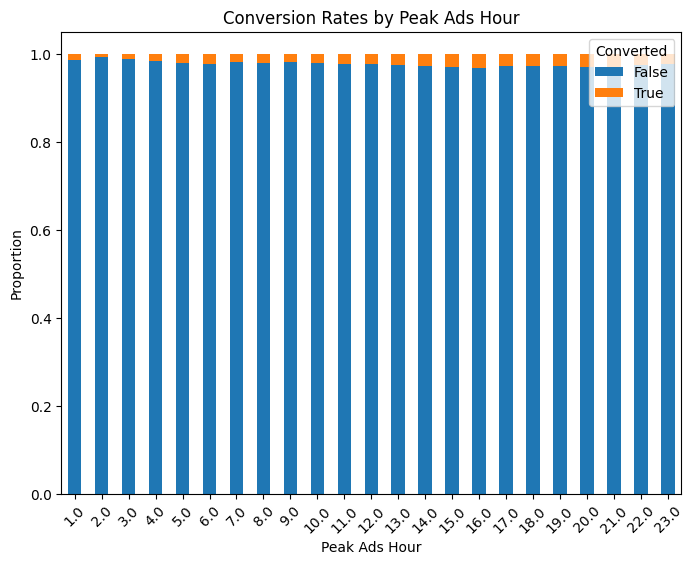

In [106]:
# Perform bivariate analysis for categorical variables
ct_conversion_test_group = pd.crosstab(data['Experiment Group'], data['Is Converted'], normalize='index')
print(ct_conversion_test_group)
ct_conversion_test_group.plot.bar(stacked=True, figsize=(8, 6))
plt.title("Conversion Rates by Experiment Group")
plt.ylabel("Proportion")
plt.xlabel("Experiment Group")
plt.legend(title="Converted", loc="upper right")
plt.show()

ct_conversion_day = pd.crosstab(data['Peak Ads Day'], data['Is Converted'], normalize='index')
print(ct_conversion_day.sort_values(by=True, ascending=False))
ct_conversion_day.plot.bar(stacked=True, figsize=(8, 6))
plt.title("Conversion Rates by Peak Ads Day")
plt.ylabel("Proportion")
plt.xlabel("Peak Ads Day")
plt.xticks(rotation=45)
plt.legend(title="Converted", loc="upper right")
plt.show()

ct_conversion_hour = pd.crosstab(data['Peak Ads Hour'], data['Is Converted'], normalize='index')
print(ct_conversion_hour.sort_values(by=True, ascending=False))
ct_conversion_hour.plot.bar(stacked=True, figsize=(8, 6))
plt.title("Conversion Rates by Peak Ads Hour")
plt.ylabel("Proportion")
plt.xlabel("Peak Ads Hour")
plt.xticks(rotation=45)
plt.legend(title="Converted", loc="upper right")
plt.show()




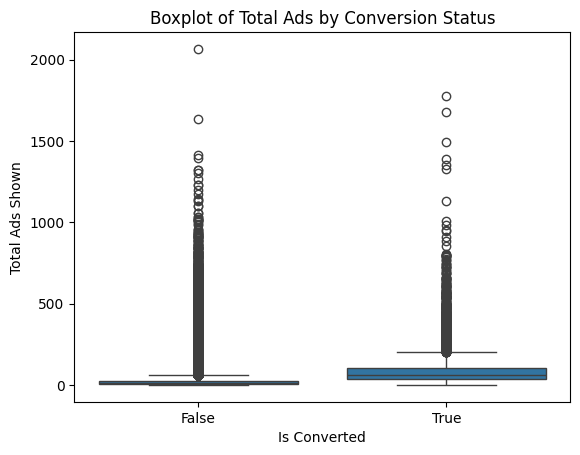

In [108]:
# Boxplots for numerical variables against conversion status
sns.boxplot(x='Is Converted', y='Total Ads Shown', data=data)
plt.title("Boxplot of Total Ads by Conversion Status")
plt.show()



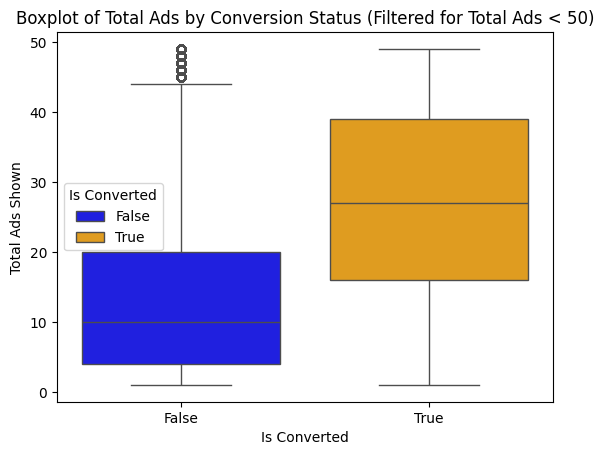

In [111]:
sns.boxplot(x='Is Converted', y='Total Ads Shown', data=data[data['Total Ads Shown'] < 50], hue='Is Converted', dodge=False, palette=['blue', 'orange'])
plt.title("Boxplot of Total Ads by Conversion Status (Filtered for Total Ads < 50)")
plt.show()

In [112]:
# Perform chi-squared test for all categorical variables against conversion
alpha = 0.05
for variable in df_cat.columns:
    if variable != 'Is Converted':
        # Create a contingency table
        contingency_table = pd.crosstab(df_cat[variable], df_cat['Is Converted'])

        # Perform chi-squared test
        chi2, p, _, _ = chi2_contingency(contingency_table)

        # Display the results
        print(f"\nChi-squared test for {variable} vs. Is Converted:")
        print(f"Chi-squared value: {chi2}")
        print(f"p-value: {p}")

        # Check for significance
        if p < alpha:
            print(f"The difference in conversion rates across {variable} is statistically significant.")
        else:
            print(f"There is no significant difference in conversion rates across {variable}.")


Chi-squared test for Experiment Group vs. Is Converted:
Chi-squared value: 54.005823883685245
p-value: 1.9989623063390075e-13
The difference in conversion rates across Experiment Group is statistically significant.

Chi-squared test for Peak Ads Day vs. Is Converted:
Chi-squared value: 410.0478857936585
p-value: 1.932184379244731e-85
The difference in conversion rates across Peak Ads Day is statistically significant.

Chi-squared test for Peak Ads Hour vs. Is Converted:
Chi-squared value: 412.12794298685975
p-value: 1.2861877998608935e-73
The difference in conversion rates across Peak Ads Hour is statistically significant.


In [117]:
# Import the necessary function
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu
#Step-1
# Shapiro-Wilk test for normality

# Normality assumption
shapiro_stat_true, shapiro_p_value_true = shapiro(data[data['Is Converted'] == True]['Total Ads Shown'])
shapiro_stat_false, shapiro_p_value_false = shapiro(data[data['Is Converted'] == False]['Total Ads Shown'])

print(f"Shapiro-Wilk test for normality (True group): p-value = {shapiro_p_value_true}")
print(f"Shapiro-Wilk test for normality (False group): p-value = {shapiro_p_value_false}")

# Equality of variances assumption

from scipy.stats import levene

levene_stat, levene_p_value = levene(
    data[data['Is Converted'] == True]['Total Ads Shown'],
    data[data['Is Converted'] == False]['Total Ads Shown']
)
print(f"Levene's test for equality of variances: p-value = {levene_p_value}")

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 14843.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 573258.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk test for normality (True group): p-value = 1.638680987007771e-98
Shapiro-Wilk test for normality (False group): p-value = 9.883049430735801e-204
Levene's test for equality of variances: p-value = 0.0


In [120]:
# Step 2: Perform a Suitable Test
if shapiro_p_value_true > alpha and shapiro_p_value_false > alpha and levene_p_value > alpha:
    # Assumptions met - use t-test for means
    t_stat, t_p_value = ttest_ind(data[data['Is Converted'] == True]['Total Ads Shown'], data[data['Is Converted'] == False]['Total Ads Shown'])
    print(f"Independent two-sample t-test: p-value = {t_p_value}")
else:
    # Assumptions not met - use Mann-Whitney U test for medians
    u_stat, u_p_value = mannwhitneyu(data[data['Is Converted'] == True]['Total Ads Shown'], data[data['Is Converted'] == False]['Total Ads Shown'])
    print(f"Mann-Whitney U test: p-value = {u_p_value}")

Mann-Whitney U test: p-value = 0.0
